# Import các thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dữ liệu

In [ ]:
dataset = pd.read_csv('/content/Mall_Customers.csv')

# Xem dữ liệu 

In [ ]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Biểu đồ tần suất theo độ tuổi của khách hàng


Ta thấy được rằng những khách hàng có độ tuổi ở khoảng từ 20 đến 40 chiếm phần lớn số lượng khách mua hàng













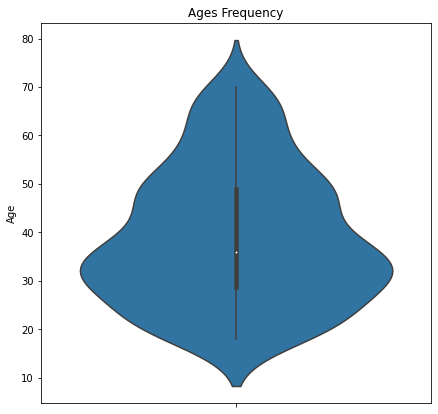

In [ ]:
plt.figure(figsize=(7,7))
plt.title("Ages Frequency")
sns.violinplot(y=dataset["Age"])
plt.show()

# Biểu đồ tiền lương hàng năm và điểm tiêu dùng
Ta thấy được rằng ở biểu đồ tiền lương hàng năm có điểm khác biệt rõ ràng hơn so với biểu đồ về điểm tiêu dùng

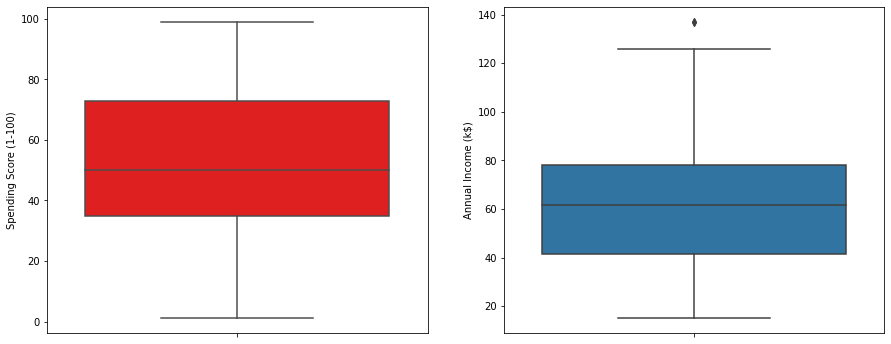

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataset["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dataset["Annual Income (k$)"])
plt.show()

# Biểu đồ số lượng khách hàng được chia theo từng nhóm điểm tiêu dùng

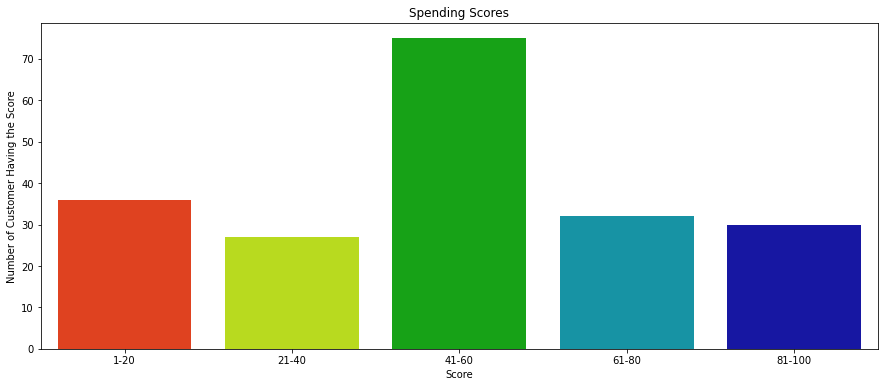

In [ ]:
ss1_20 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 1) & (dataset["Spending Score (1-100)"] <= 20)]
ss21_40 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 21) & (dataset["Spending Score (1-100)"] <= 40)]
ss41_60 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 41) & (dataset["Spending Score (1-100)"] <= 60)]
ss61_80 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 61) & (dataset["Spending Score (1-100)"] <= 80)]
ss81_100 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 81) & (dataset["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

# Biểu đồ số lượng khách hàng được phân chia theo từng nhóm mức lương hàng năm

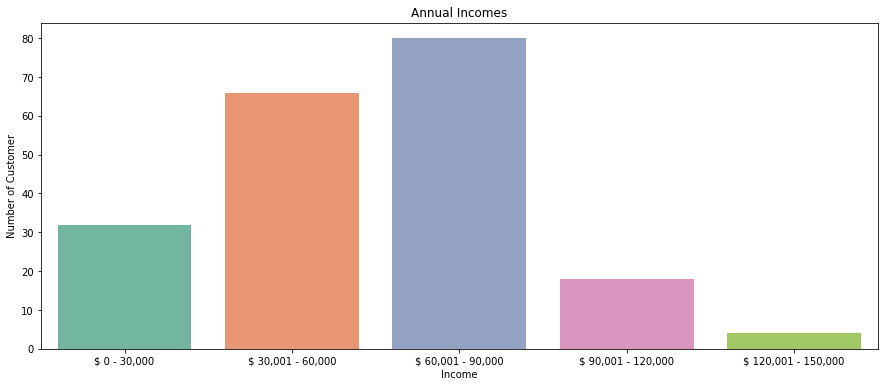

In [ ]:
ai0_30 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 0) & (dataset["Annual Income (k$)"] <= 30)]
ai31_60 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 31) & (dataset["Annual Income (k$)"] <= 60)]
ai61_90 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 61) & (dataset["Annual Income (k$)"] <= 90)]
ai91_120 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 91) & (dataset["Annual Income (k$)"] <= 120)]
ai121_150 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 121) & (dataset["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# Biểu đồ thể hiện tương quan giữa các thuộc tính

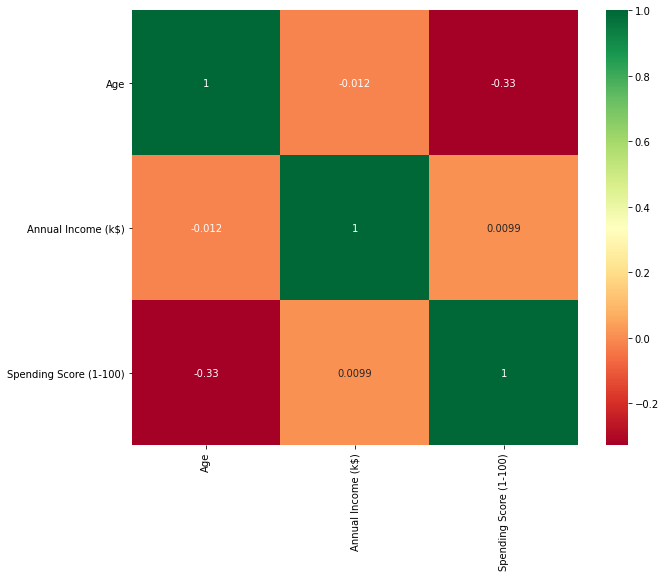

In [ ]:
sns.heatmap(dataset.drop(['CustomerID'],axis=1).corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

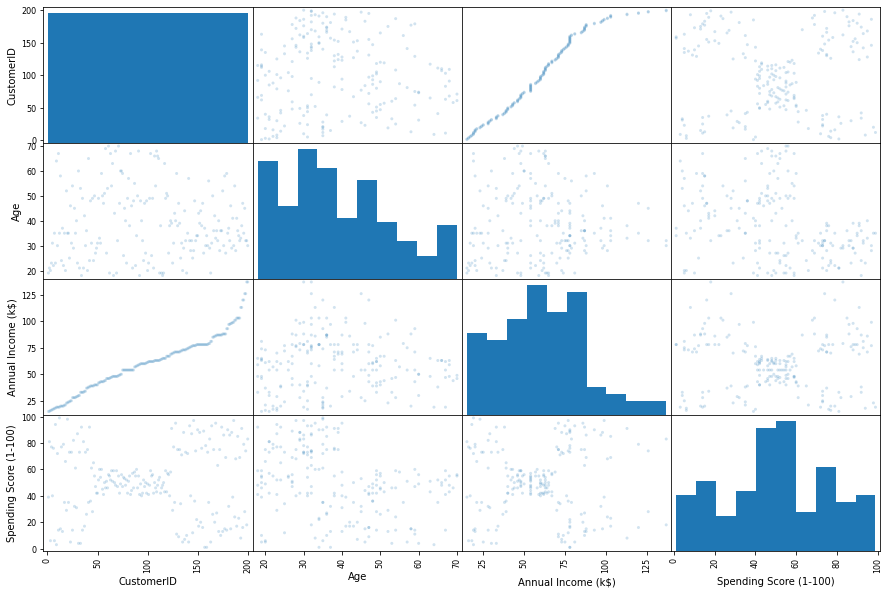

In [ ]:
pd.plotting.scatter_matrix(dataset, alpha=0.2, figsize=(15, 10))
plt.show()

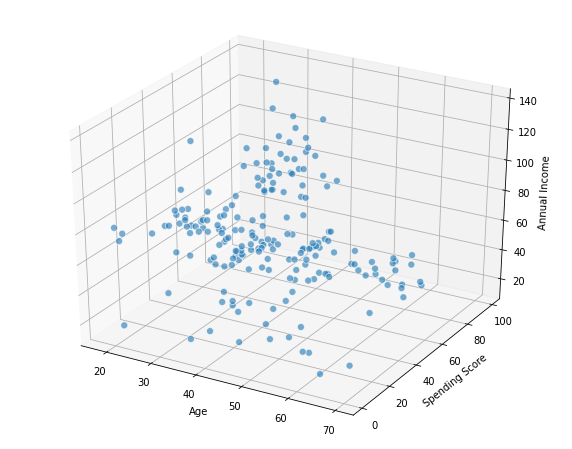

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs = dataset['Age']
ys = dataset['Spending Score (1-100)']
zs = dataset['Annual Income (k$)']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Annual Income')

plt.show()

# Tìm số lượng cụm thích hợp theo phương pháp khuỷu tay

In [ ]:
dataset.iloc[:,-2:]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


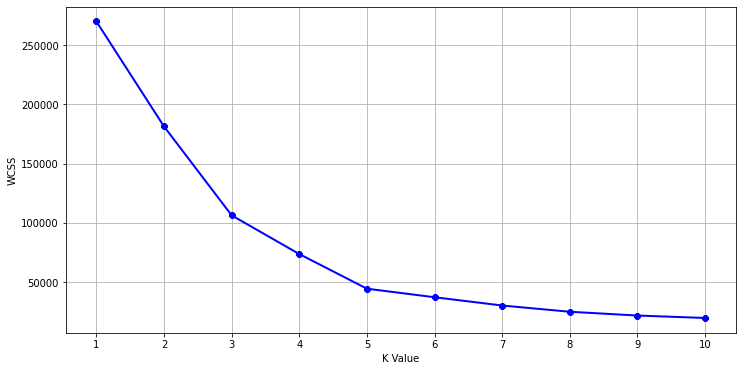

In [ ]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(dataset.iloc[:,-2:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Ta thấy rằng từ giá trị K = 5 trở về sau thì giá trị hàm lỗi giảm chậm dần, vậy nên ta chọn k = 5 làm số lượng cụm

#Xây dựng mô hình

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
X_k = dataset['Annual Income (k$)'].values
y_k = dataset['Spending Score (1-100)'].values
X_k1 = dataset[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

In [ ]:
model = KMeans(n_clusters=5)
model.fit(X_k1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_kmeans = model.fit_predict(X_k1)

In [ ]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

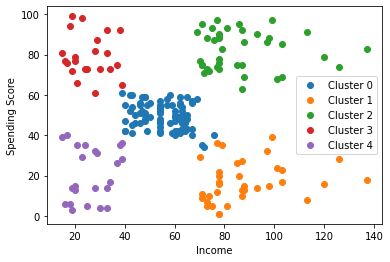

In [ ]:
unique_labels = set(model.labels_)
for c in unique_labels:  
    plt.scatter(X_k1[model.labels_ == c, 0],
                X_k1[model.labels_ == c, 1],
                label='Cluster {}'.format(c))
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
dataset_seg = pd.DataFrame({'Segmentation':model.labels_})
dataset_new = pd.concat([dataset, dataset_seg], axis=1, sort=False)
dataset_new = dataset_new.drop(['CustomerID'], axis=1)
dataset_new.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Segmentation
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


#Mô hình dự đoán

In [ ]:
X_new = dataset_new.drop(['Segmentation'],axis=1)
Y_new = dataset_new['Segmentation']

dataset_gender = pd.get_dummies(X_new['Gender'])
X_new = X_new.drop(['Gender'],axis=1)
X_new = pd.concat([X_new,dataset_gender],axis=1, sort=False)

X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, stratify = Y_new, test_size=0.3, random_state = 42)

In [ ]:
Y_train_bin = pd.get_dummies(Y_train)
Y_test_bin = pd.get_dummies(Y_test)

In [ ]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
model_dt = dt.fit(X_train,Y_train_bin)
model_rf = rf.fit(X_train,Y_train_bin)
model_knn = knn.fit(X_train, Y_train_bin)

In [ ]:
Y_pred_dt = model_dt.predict(X_test)
Y_pred_rf = model_rf.predict(X_test)
Y_pred_knn = model_knn.predict(X_test)

In [ ]:
Y_test_pred = Y_test_bin.idxmax(axis=1).tolist()

In [ ]:
rf_results_pred = pd.DataFrame({'0':Y_pred_rf[:,0],
                             '1':Y_pred_rf[:,1],
                             '2':Y_pred_rf[:,2],
                             '3':Y_pred_rf[:,3],
                             '4':Y_pred_rf[:,4]})

rf_pred = rf_results_pred.idxmax(axis=1).tolist()

final_rf =  pd.DataFrame({'Predicted':rf_pred,
                         'Actual':Y_test_pred})
print("Random Forest")
final_rf.head(5)

Random Forest


,Predicted,Actual
0,4,4
1,1,1
2,3,3
3,2,2
4,3,3


In [ ]:
dt_results_pred = pd.DataFrame({'0':Y_pred_dt[:,0],
                             '1':Y_pred_dt[:,1],
                             '2':Y_pred_dt[:,2],
                             '3':Y_pred_dt[:,3],
                             '4':Y_pred_dt[:,4]})

dt_pred = dt_results_pred.idxmax(axis=1).tolist()

final_df =  pd.DataFrame({'Predicted':dt_pred,
                         'Actual':Y_test_pred})
print("Decision Tree")
final_df.head(5)

Decision Tree


,Predicted,Actual
0,4,4
1,1,1
2,3,3
3,2,2
4,3,3


In [ ]:
knn_results_pred = pd.DataFrame({'0':Y_pred_knn[:,0],
                             '1':Y_pred_knn[:,1],
                             '2':Y_pred_knn[:,2],
                             '3':Y_pred_knn[:,3],
                             '4':Y_pred_knn[:,4]})

knn_pred = knn_results_pred.idxmax(axis=1).tolist()

final_df =  pd.DataFrame({'Predicted':knn_pred,
                         'Actual':Y_test_pred})
print("KNN")
final_df.head(5)

KNN


,Predicted,Actual
0,4,4
1,1,1
2,3,3
3,2,2
4,3,3


#Đánh giá mô hình

In [ ]:
print("Decision Tree Scores")
print("Accuracy: {}".format(accuracy_score(Y_test_bin,Y_pred_dt)))

print("Random Forest Scores")
print("Accuracy: {}".format(accuracy_score(Y_test_bin,Y_pred_rf)))

print("K-Neighbors Scores")
print("Accuracy: {}".format(accuracy_score(Y_test_bin,Y_pred_knn)))

Decision Tree Scores
Accuracy: 0.9666666666666667
Random Forest Scores
Accuracy: 0.9666666666666667
K-Neighbors Scores
Accuracy: 0.9666666666666667


In [ ]:
class_labels = list(Y_train_bin.columns.values)

In [ ]:
import itertools
import sklearn.metrics

def plot_confusion_matrix(Y_test, Y_pred, labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = sklearn.metrics.confusion_matrix(Y_test, Y_pred, labels=labels)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
pred = []
for yp in dt_pred:
    pred.append(int(yp))

In [ ]:
pred1 = []
for yp in rf_pred:
    pred1.append(int(yp))

In [ ]:
pred2 = []
for yp in knn_pred:
    pred2.append(int(yp))

In [ ]:
main_test = []
for yt in Y_test_pred:
    main_test.append(int(yt))

Confusion matrix, without normalization
[[24  0  0  0  0]
 [ 1  9  0  0  0]
 [ 1  0 11  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  7]]


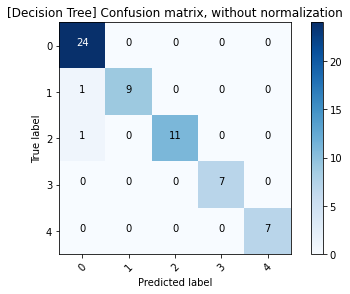

Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.1        0.9        0.         0.         0.        ]
 [0.08333333 0.         0.91666667 0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]


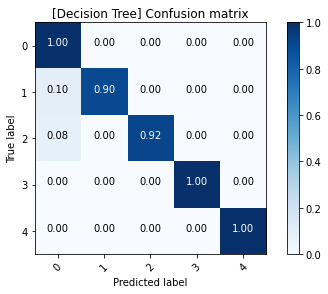

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.90      0.95        10
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7

    accuracy                           0.97        60
   macro avg       0.98      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
plt.figure()
plot_confusion_matrix(main_test, pred, labels=class_labels,
                      title='[Decision Tree] Confusion matrix, without normalization')
plot_confusion_matrix(main_test, pred, labels=class_labels, normalize=True,
                      title='[Decision Tree] Confusion matrix')
print("Classification Report for Decision Tree:")
print(classification_report(Y_test, pred, labels=class_labels))

Confusion matrix, without normalization
[[23  1  0  0  0]
 [ 1  9  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  7]]


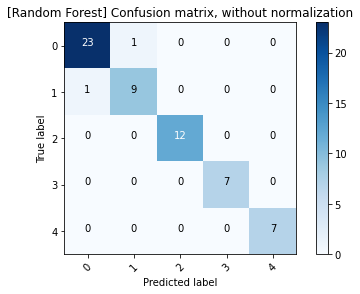

Normalized confusion matrix
[[0.95833333 0.04166667 0.         0.         0.        ]
 [0.1        0.9        0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]


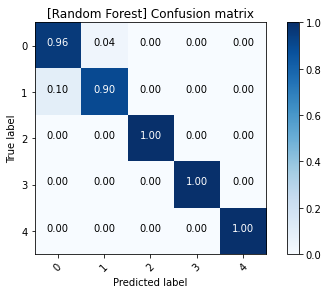

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.90      0.90      0.90        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
plt.figure()
plot_confusion_matrix(main_test, pred1, labels=class_labels,
                      title='[Random Forest] Confusion matrix, without normalization')
plot_confusion_matrix(main_test, pred1, labels=class_labels, normalize=True,
                      title='[Random Forest] Confusion matrix')
print("Classification Report for Random Forest:")
print(classification_report(Y_test, pred1, labels=class_labels))

Confusion matrix, without normalization
[[24  0  0  0  0]
 [ 2  8  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  7]]


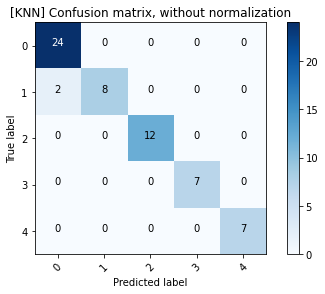

Normalized confusion matrix
[[1.  0.  0.  0.  0. ]
 [0.2 0.8 0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  1. ]]


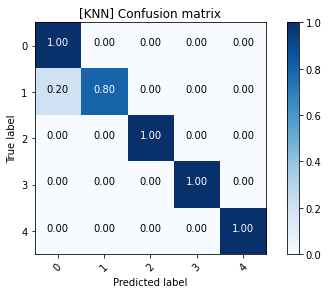

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        24
           1       1.00      0.80      0.89        10
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7

    accuracy                           0.97        60
   macro avg       0.98      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
plt.figure()
plot_confusion_matrix(main_test, pred2, labels=class_labels,
                      title='[KNN] Confusion matrix, without normalization')
plot_confusion_matrix(main_test, pred2, labels=class_labels, normalize=True,
                      title='[KNN] Confusion matrix')
print("Classification Report for KNN:")
print(classification_report(Y_test, pred2, labels=class_labels))